<a href="https://colab.research.google.com/github/AbhishekDataAnalyst/-CODING-SAMURAI/blob/main/CODING_SAMURAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) on Airbnb Listings Project

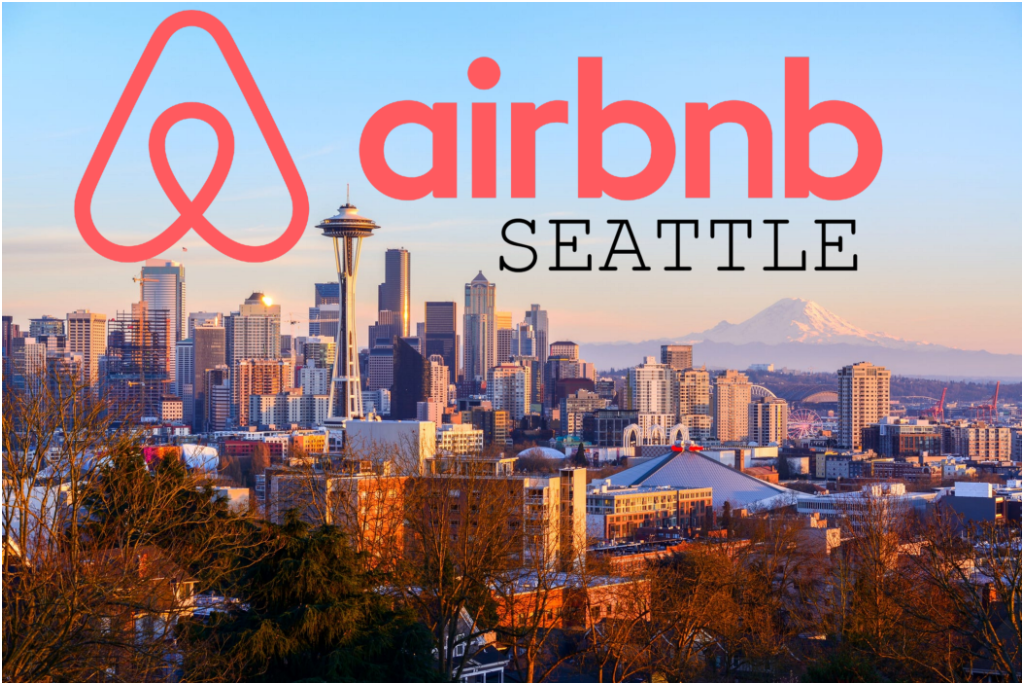

Welcome to the Exploratory Data Analysis (EDA) report based on the Airbnb dataset of Seattle, Washington, US.

## Introduction

Founded in 2008, Airbnb is a global online marketplace that connects hosts offering unique living spaces with guests seeking authentic travel experiences. From cozy city apartments to charming beach bungalows and even quirky treehouses, Airbnb transcends traditional hotels, allowing guests to immerse themselves in local communities and live like residents. With millions of listings in over 191 countries, Airbnb empowers hosts to earn income by sharing their spaces, while offering guests a more diverse and affordable alternative to hotels, fostering a sense of connection and belonging wherever they travel.


In this project, we delve into the world of Airbnb listings in Seattle, WA, to uncover insights, trends, and patterns that are hidden within the data. By performing a thorough analysis, we aim to better understand the factors that influence pricing, occupancy, and customer reviews.


We are going to solve this project by using the six-phase data analysis process which involves Ask, Prepare, Process, Analyze, Share and Act.

## Ask

The ask phase is the start of the data analysis cycle, it involves clearly defining the scope of the project, the problem to be solved, and identifying stakeholders and stakeholder’s expectations by asking SMART (Specific, Measurable, Action-oriented, Relevant, Time-bound) questions.

The following questions may guide us to our analysis: -

1. Does the price change with features like host being superhost, neighbourhood, property type and room type?
2. How does the price range varies throughout the year? Can we detect any seasonal pattern for pricing of the place?
3. How did people felt after their stay?

## Prepare

This includes identifying the source of the information that will be utilized for the analysis, guaranteeing that the information source is dependable, unique, thorough, current and referred to, demonstrating the knowledge, ensuring that the information is liberated from any bias in the assortment of the information and, regarding each part of data ethics while dealing with the information.

The data used here is the Seattle Airbnb Open Data from Jan 2016 to Jan 2017 from Kaggle under the license CC0: Public Domain.

Dataset:- https://www.kaggle.com/datasets/airbnb/seattle/?select=listings.csv

The dataset consists of 3 csv files:-

1. listings.csv: The files consist of the apartment process, room types, host, and prices of properties. It consists of 3819 rows and 92 columns.

2. reviews.csv: The files contain at least 84k reviews regarding the property. It consists of 84850 rows and 6 columns.

3. calender.csv: The files contain information about occupancy and availability for 2873 listings every day from January 2016 to January 2017. It includes the listing ID, date, availability (t: available, f: occupied), and price. It consists of 934542 rows and 4 columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import csv

In [3]:
lists = pd.read_csv('/content/drive/MyDrive/Coding Samurai/listings.csv')
lists

id                                 name   host_id host_name  \
0       241032         Stylish Queen Anne Apartment    956883     Maija   
1       953595   Bright & Airy Queen Anne Apartment   5177328    Andrea   
2      3308979  New Modern House-Amazing water view  16708587      Jill   
3      7421966                   Queen Anne Chateau   9851441     Emily   
4       278830       Charming craftsman 3 bdm house   1452570     Emily   
...        ...                                  ...       ...       ...   
3813   8101950   3BR Mountain View House in Seattle  31148752        Bo   
3814   8902327    Portage Bay View!-One Bedroom Apt  46566046      Glen   
3815  10267360    Private apartment view of Lake WA  52791370  Virginia   
3816   9604740    Amazing View with Modern Comfort!  25522052     Karen   
3817  10208623            Large Lakefront Apartment  14703116       Gil   

     host_is_superhost neighbourhood     city   latitude   longitude  \
0                    f    Queen Anne  Seattle  47.636289 -122.371025   
1                    t    Queen Anne  Seattle  47.639123 -122.365667   
2                    f    Queen Anne  Seattle  47.629724 -122.369483   
3                    f    Queen Anne  Seattle  47.638473 -122.369279   
4                    f    Queen Anne  Seattle  47.632918 -122.372471   
...                ...           ...      ...        ...         ...   
3813                 f       Fremont  Seattle  47.664295 -122.359170   
3814                 f   Portage Bay  Seattle  47.649552 -122.318309   
3815                 f           NaN  Seattle  47.508453 -122.240607   
3816                 f           NaN  Seattle  47.632335 -122.275530   
3817                 f    Queen Anne  Seattle  47.641186 -122.342085   

     property_type  ... bedrooms  beds  bed_type  square_feet  price  \
0        Apartment  ...      1.0   1.0  Real Bed          NaN     85   
1        Apartment  ...      1.0   1.0  Real Bed          NaN    150   
2            House  ...      5.0   7.0  Real Bed          NaN    975   
3        Apartment  ...      0.0   2.0  Real Bed          NaN    100   
4            House  ...      3.0   3.0  Real Bed          NaN    450   
...            ...  ...      ...   ...       ...          ...    ...   
3813         House  ...      3.0   3.0  Real Bed          NaN    359   
3814     Apartment  ...      1.0   2.0  Real Bed          NaN     79   
3815         House  ...      1.0   1.0  Real Bed          NaN     93   
3816   Condominium  ...      0.0   1.0  Real Bed          NaN     99   
3817     Apartment  ...      2.0   1.0  Real Bed          NaN     87   

     weekly_price  monthly_price  number_of_reviews review_scores_rating  \
0             NaN            NaN                207                 95.0   
1            1000           3000                 43                 96.0   
2             NaN            NaN                 20                 97.0   
3             650           2300                  0                  NaN   
4             NaN            NaN                 38                 92.0   
...           ...            ...                ...                  ...   
3813          NaN            NaN                  1                 80.0   
3814          NaN            NaN                  2                100.0   
3815          450            NaN                  0                  NaN   
3816          NaN            NaN                  0                  NaN   
3817          NaN            NaN                  0                  NaN   

     reviews_per_month  
0                 4.07  
1                 1.48  
2                 1.15  
3                  NaN  
4                 0.89  
...                ...  
3813              0.30  
3814              2.00  
3815               NaN  
3816               NaN  
3817               NaN  

[3818 rows x 23 columns]

In [4]:
lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   name                  3818 non-null   object 
 2   host_id               3818 non-null   int64  
 3   host_name             3816 non-null   object 
 4   host_is_superhost     3816 non-null   object 
 5   neighbourhood         3402 non-null   object 
 6   city                  3818 non-null   object 
 7   latitude              3818 non-null   float64
 8   longitude             3818 non-null   float64
 9   property_type         3817 non-null   object 
 10  room_type             3818 non-null   object 
 11  accommodates          3818 non-null   int64  
 12  bathrooms             3802 non-null   float64
 13  bedrooms              3812 non-null   float64
 14  beds                  3817 non-null   float64
 15  bed_type             

In [5]:
review = pd.read_csv('/content/drive/MyDrive/Coding Samurai/reviews.csv')
review

listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  19-07-2015     28943674        Bianca   
1         7202016  39087409  20-07-2015     32440555         Frank   
2         7202016  39820030  26-07-2015     37722850           Ian   
3         7202016  40813543  02-08-2015     33671805        George   
4         7202016  41986501  10-08-2015     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  12-10-2015     37419458          Ryan   
84845     3624990  51024875  17-10-2015      6933252         Linda   
84846     3624990  51511988  20-10-2015     19543701         Jaime   
84847     3624990  52814482  02-11-2015     24445024        Jørgen   
84848     9727246  56429621  13-12-2015     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84849 rows x 6 columns]

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [7]:
calendar = pd.read_csv('/content/drive/MyDrive/Coding Samurai/calendar.csv')
calendar

listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]

In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


##Prepare

This involves all the steps taken to clean the data, making sure the data has integrity (the data is accurate, complete, consistent and trustworthy) before analyzing it, aligning the data to the business objective and also carrying out data verification. We must sure that the process involves checking of misspellings, inconsistent capitalizations and typos, checking for duplicate entries and blank cells and checking for consistent data format across each column

First lets deal with null values of lists dataset

In [9]:
null_counts = lists.isnull().sum() # counts null values in each column of dataset
print(null_counts)

id                         0
name                       0
host_id                    0
host_name                  2
host_is_superhost          2
neighbourhood            416
city                       0
latitude                   0
longitude                  0
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
bed_type                   0
square_feet             3721
price                      0
weekly_price            1809
monthly_price           2301
number_of_reviews          0
review_scores_rating     647
reviews_per_month        627
dtype: int64


In [10]:
# convert 'weekly_price' and 'monthly_price' column data type from object to float
lists['weekly_price'] = pd.to_numeric(lists['weekly_price'], errors='coerce')
lists['monthly_price'] = pd.to_numeric(lists['monthly_price'], errors='coerce')

In [11]:
#selct all columns with numeric data
lists_num = ["bedrooms","beds","square_feet","weekly_price","monthly_price","review_scores_rating","reviews_per_month"]
lists_num

['bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'review_scores_rating',
 'reviews_per_month']

In [12]:
# replace the null values with mean values of that column
lists[lists_num] = lists[lists_num].fillna(lists[lists_num].mean())

In [13]:
null_counts = lists.isnull().sum() # counts null values in each column of dataset
print(null_counts)

id                        0
name                      0
host_id                   0
host_name                 2
host_is_superhost         2
neighbourhood           416
city                      0
latitude                  0
longitude                 0
property_type             1
room_type                 0
accommodates              0
bathrooms                16
bedrooms                  0
beds                      0
bed_type                  0
square_feet               0
price                     0
weekly_price              0
monthly_price             0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
dtype: int64


For text column type, what we would do is remoce all hte rows with null values, since replacing them with data is irrelevant

In [14]:
lists = lists.dropna()  # Drops any row with at least one null value

In [15]:
lists

id                                 name   host_id   host_name  \
0       241032         Stylish Queen Anne Apartment    956883       Maija   
1       953595   Bright & Airy Queen Anne Apartment   5177328      Andrea   
2      3308979  New Modern House-Amazing water view  16708587        Jill   
3      7421966                   Queen Anne Chateau   9851441       Emily   
4       278830       Charming craftsman 3 bdm house   1452570       Emily   
...        ...                                  ...       ...         ...   
3811   8578490       Super Convenient Top Floor Apt  11847918        Ryan   
3812   3383329  OF THE TREE & CLOUDS. KID FRIENDLY!   3443346  Jacqueline   
3813   8101950   3BR Mountain View House in Seattle  31148752          Bo   
3814   8902327    Portage Bay View!-One Bedroom Apt  46566046        Glen   
3817  10208623            Large Lakefront Apartment  14703116         Gil   

     host_is_superhost neighbourhood     city   latitude   longitude  \
0                    f    Queen Anne  Seattle  47.636289 -122.371025   
1                    t    Queen Anne  Seattle  47.639123 -122.365667   
2                    f    Queen Anne  Seattle  47.629724 -122.369483   
3                    f    Queen Anne  Seattle  47.638473 -122.369279   
4                    f    Queen Anne  Seattle  47.632918 -122.372471   
...                ...           ...      ...        ...         ...   
3811                 f       Fremont  Seattle  47.657898 -122.346692   
3812                 t       Fremont  Seattle  47.654516 -122.358124   
3813                 f       Fremont  Seattle  47.664295 -122.359170   
3814                 f   Portage Bay  Seattle  47.649552 -122.318309   
3817                 f    Queen Anne  Seattle  47.641186 -122.342085   

     property_type  ... bedrooms  beds  bed_type  square_feet  price  \
0        Apartment  ...      1.0   1.0  Real Bed   854.618557     85   
1        Apartment  ...      1.0   1.0  Real Bed   854.618557    150   
2            House  ...      5.0   7.0  Real Bed   854.618557    975   
3        Apartment  ...      0.0   2.0  Real Bed   854.618557    100   
4            House  ...      3.0   3.0  Real Bed   854.618557    450   
...            ...  ...      ...   ...       ...          ...    ...   
3811     Apartment  ...      1.0   1.0  Real Bed   854.618557     65   
3812     Apartment  ...      1.0   2.0  Real Bed   854.618557     95   
3813         House  ...      3.0   3.0  Real Bed   854.618557    359   
3814     Apartment  ...      1.0   2.0  Real Bed   854.618557     79   
3817     Apartment  ...      2.0   1.0  Real Bed   854.618557     87   

     weekly_price  monthly_price  number_of_reviews  review_scores_rating  \
0      775.116456    2601.166667                207             95.000000   
1     1000.000000    3000.000000                 43             96.000000   
2      775.116456    2601.166667                 20             97.000000   
3      650.000000    2300.000000                  0             94.539262   
4      775.116456    2601.166667                 38             92.000000   
...           ...            ...                ...                   ...   
3811   775.116456    2601.166667                  2            100.000000   
3812   600.000000    2200.000000                 73             96.000000   
3813   775.116456    2601.166667                  1             80.000000   
3814   775.116456    2601.166667                  2            100.000000   
3817   775.116456    2601.166667                  0             94.539262   

      reviews_per_month  
0              4.070000  
1              1.480000  
2              1.150000  
3              2.078919  
4              0.890000  
...                 ...  
3811           0.630000  
3812           4.010000  
3813           0.300000  
3814           2.000000  
3817           2.078919  

[3383 rows x 23 columns]

In [16]:
null_counts = lists.isnull().sum() # counts null values in each column of dataset
print(null_counts)

id                      0
name                    0
host_id                 0
host_name               0
host_is_superhost       0
neighbourhood           0
city                    0
latitude                0
longitude               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
bed_type                0
square_feet             0
price                   0
weekly_price            0
monthly_price           0
number_of_reviews       0
review_scores_rating    0
reviews_per_month       0
dtype: int64


Now there are no null values in the lists dataset

Second lets deal with the review dataset

In [17]:
null_counts = review.isnull().sum() # counts null values in each column of dataset
print(null_counts)

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [18]:
review = review.dropna() # Drops any row with at least one null value

In [19]:
null_counts = review.isnull().sum() # counts null values in each column of dataset
print(null_counts)

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64


In [20]:
review

listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  19-07-2015     28943674        Bianca   
1         7202016  39087409  20-07-2015     32440555         Frank   
2         7202016  39820030  26-07-2015     37722850           Ian   
3         7202016  40813543  02-08-2015     33671805        George   
4         7202016  41986501  10-08-2015     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  12-10-2015     37419458          Ryan   
84845     3624990  51024875  17-10-2015      6933252         Linda   
84846     3624990  51511988  20-10-2015     19543701         Jaime   
84847     3624990  52814482  02-11-2015     24445024        Jørgen   
84848     9727246  56429621  13-12-2015     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84831 rows x 6 columns]

Last, lets deal with the calendar dataset

In [21]:
calendar["price"] = calendar["price"].str.replace("$", "")

<ipython-input-21-7bb76f50cd26>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar["price"] = calendar["price"].str.replace("$", "")


In [22]:
# convert 'price' column data type from object to float
calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce')

# convert 'date' column data type from object to date
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

In [23]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       933845 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [24]:
null_counts = calendar.isnull().sum() # counts null values in each column of dataset
print(null_counts)

listing_id         0
date               0
available          0
price         459725
dtype: int64


In [25]:
calendar_col = ["price"]
calendar_col

['price']

In [26]:
# replace the null values with mean values of that column
calendar[calendar_col] = calendar[calendar_col].fillna(calendar[calendar_col].mean()).round(2)

In [27]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [28]:
null_counts = calendar.isnull().sum() # counts null values in each column of dataset
print(null_counts)

listing_id    0
date          0
available     0
price         0
dtype: int64


## Analyze

In this phase, we are going to solve all the questions by analyzing all the datasets we just processed

## 1. Does the price change with features like host being superhost, neighbourhood, property type and room type and reviews?

In [29]:
q1 = lists[["id","host_id","host_is_superhost","neighbourhood","property_type","bed_type","price","number_of_reviews","review_scores_rating"]]
q1

id   host_id host_is_superhost neighbourhood property_type  \
0       241032    956883                 f    Queen Anne     Apartment   
1       953595   5177328                 t    Queen Anne     Apartment   
2      3308979  16708587                 f    Queen Anne         House   
3      7421966   9851441                 f    Queen Anne     Apartment   
4       278830   1452570                 f    Queen Anne         House   
...        ...       ...               ...           ...           ...   
3811   8578490  11847918                 f       Fremont     Apartment   
3812   3383329   3443346                 t       Fremont     Apartment   
3813   8101950  31148752                 f       Fremont         House   
3814   8902327  46566046                 f   Portage Bay     Apartment   
3817  10208623  14703116                 f    Queen Anne     Apartment   

      bed_type  price  number_of_reviews  review_scores_rating  
0     Real Bed     85                207             95.000000  
1     Real Bed    150                 43             96.000000  
2     Real Bed    975                 20             97.000000  
3     Real Bed    100                  0             94.539262  
4     Real Bed    450                 38             92.000000  
...        ...    ...                ...                   ...  
3811  Real Bed     65                  2            100.000000  
3812  Real Bed     95                 73             96.000000  
3813  Real Bed    359                  1             80.000000  
3814  Real Bed     79                  2            100.000000  
3817  Real Bed     87                  0             94.539262  

[3383 rows x 9 columns]

In [30]:
q1.isnull().sum() #finds null values in q1 dataset

id                      0
host_id                 0
host_is_superhost       0
neighbourhood           0
property_type           0
bed_type                0
price                   0
number_of_reviews       0
review_scores_rating    0
dtype: int64

In [31]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3383 non-null   int64  
 1   host_id               3383 non-null   int64  
 2   host_is_superhost     3383 non-null   object 
 3   neighbourhood         3383 non-null   object 
 4   property_type         3383 non-null   object 
 5   bed_type              3383 non-null   object 
 6   price                 3383 non-null   int64  
 7   number_of_reviews     3383 non-null   int64  
 8   review_scores_rating  3383 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 264.3+ KB


We don't have any duplicate values.

Lets check the no. of duplicate values in the q1 dataset

In [32]:
q1.duplicated().value_counts() # counts duplicate values

False    3383
dtype: int64

Text(0.5, 1.0, 'Price Distribution by no. of hosts')

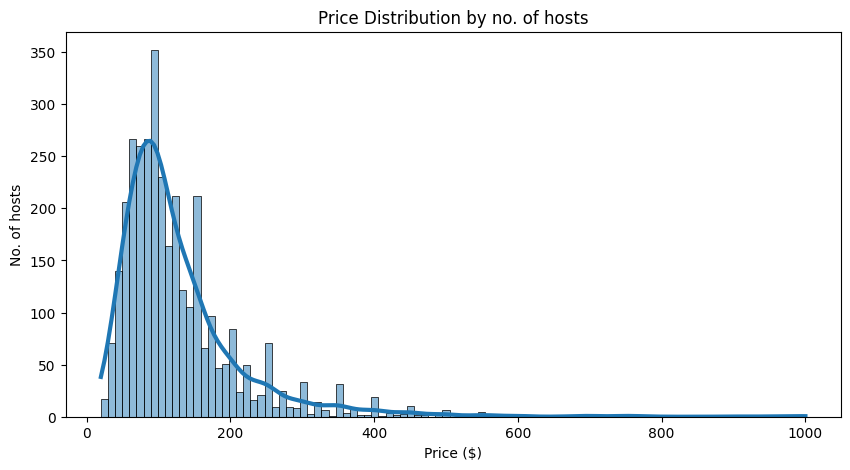

In [33]:
#plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=q1,x= q1['price'],kde=True, line_kws={'linewidth': 3}) #(dataset, plot price in x-axis, adds line in plot, adding thickness in line)
# Add labels
plt.xlabel("Price ($)")
plt.ylabel("No. of hosts")
plt.title("Price Distribution by no. of hosts")

Text(0.5, 1.0, 'Price Distribution by no. of hosts')

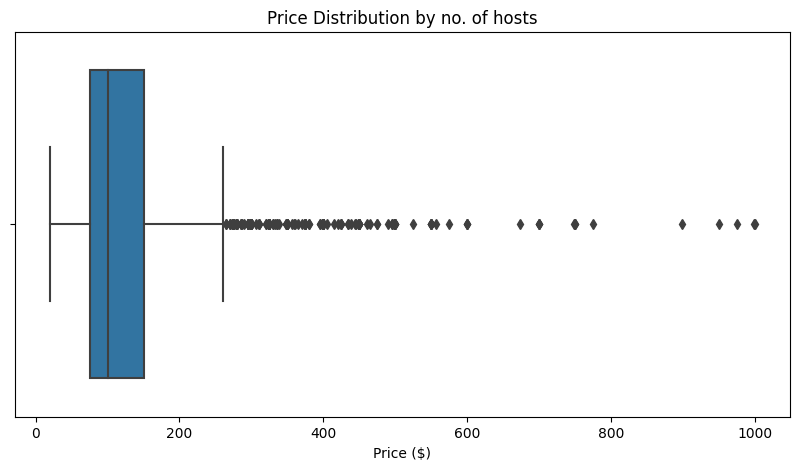

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=q1 ,x = q1['price'])
# Add labels
plt.xlabel("Price ($)")
plt.title("Price Distribution by no. of hosts")

- The distribution of the data is right-skewed, meaning there are more data points towards the lower end of the income range.
- This also means that we might have a lot of outliers. The outliers can be seen in the boxplot. But, the real question is are the outliers really outliers.
- If the property is located in a good neighbourhood, if host is a superhost with a lot of facilities and the owner is renting the whole house then the price can go really high.
- Their might be some host who host people with high class cleaniness, amenities, comfort making the price hike. So, they might not be outliers but seems like outliers.

## (a) Superhost v/s Price

In [35]:
superhost = q1.groupby('host_is_superhost')['price'].mean().sort_values(ascending = False).reset_index()
superhost

host_is_superhost       price
0                 t  130.508380
1                 f  128.991001

Text(0.5, 1.0, 'Superhost vs. Price')

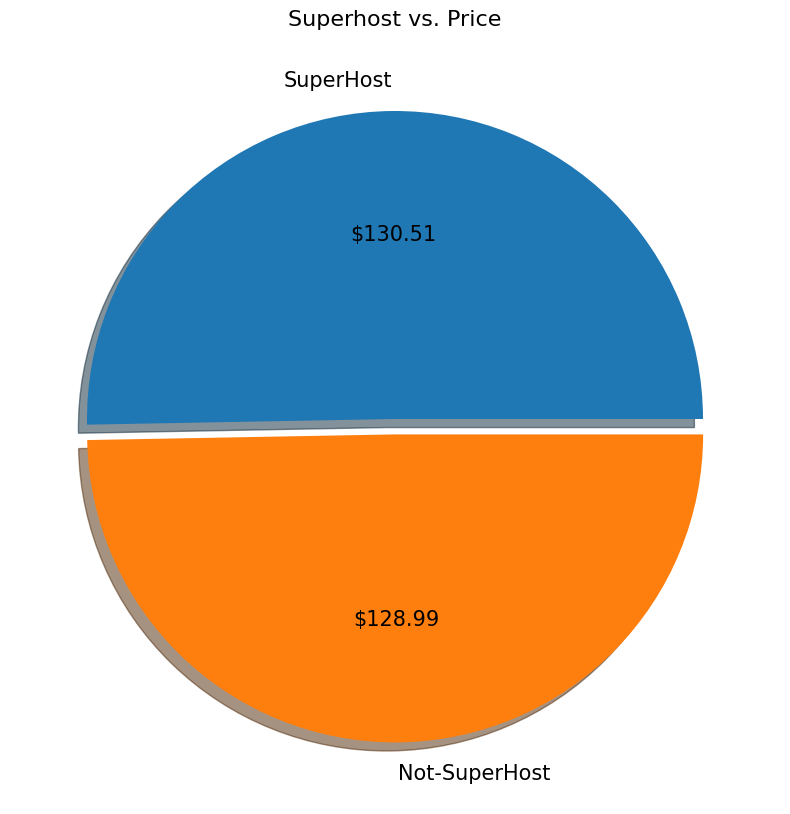

In [36]:
plt.figure(figsize=(10,10))

values = superhost['price']
ax = plt.pie(superhost['price'], labels = ['SuperHost','Not-SuperHost'], autopct = lambda x: '${:.2f}'.format(x*values.sum()/100), shadow=True, explode = (0,0.05), textprops={'fontsize': 15})
plt.title('Superhost vs. Price', fontsize=16)

Here there is not much difference between Superhost and Non-superhost with only a dollar. However, having a superhost brings more credibility to the neighbourhood as they could have the potential to reach out to more customers and rent the property for a long term which in return would bring them more money and would boost their profile.

## (b) Neighbourhood v/s Price

In this, top 5 most expensive and top 5 cheapest neighbourhoods to live will be analyzed

In [37]:
neighbourhood = q1.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).reset_index().round(2)
neighbourhood

neighbourhood   price
0        Fairmount Park  370.00
1   Industrial District  245.00
2           Portage Bay  241.43
3              Westlake  197.00
4                  Alki  196.65
..                  ...     ...
75           Georgetown   77.00
76        Rainier Beach   76.72
77               Dunlap   71.75
78        Olympic Hills   63.67
79              Roxhill   60.00

[80 rows x 2 columns]

[Text(0, 0, '370'),
 Text(0, 0, '245'),
 Text(0, 0, '241.43'),
 Text(0, 0, '197'),
 Text(0, 0, '196.65')]

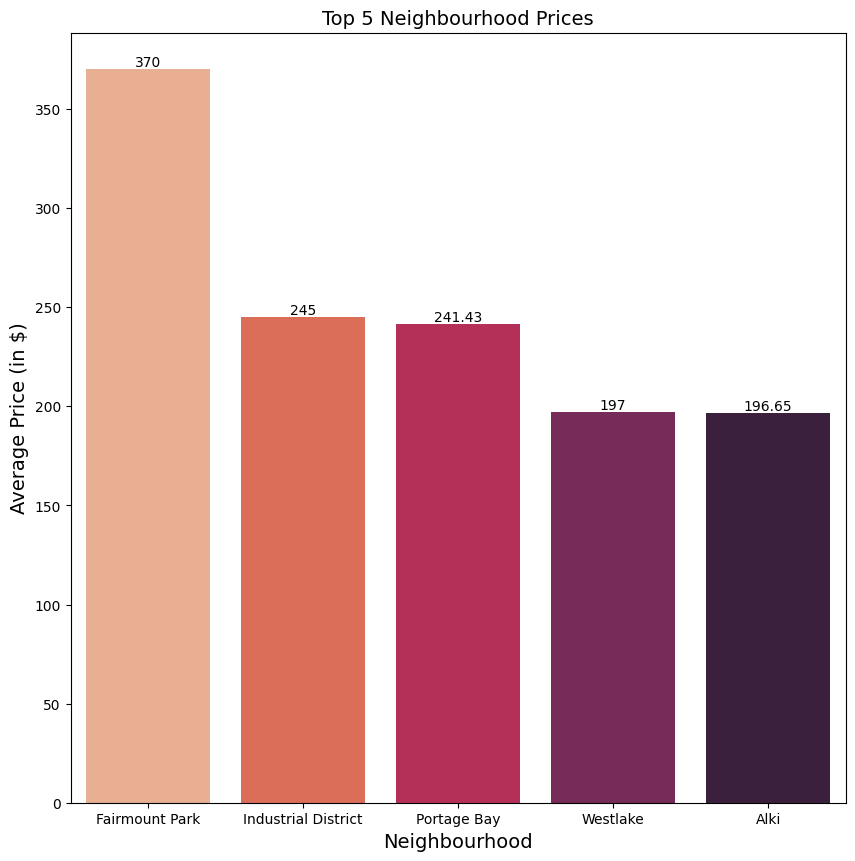

In [38]:
top5neigh = neighbourhood.head(5) # filters top 5 neighbourhood

plt.figure(figsize=(10,10))
ax = sns.barplot(data=top5neigh, x='neighbourhood',y='price',palette = 'rocket_r')
plt.title('Top 5 Neighbourhood Prices',fontsize=14)
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Average Price (in $)',fontsize=14)
ax.bar_label(ax.containers[0])  # add data labels

[Text(0, 0, '77'),
 Text(0, 0, '76.72'),
 Text(0, 0, '71.75'),
 Text(0, 0, '63.67'),
 Text(0, 0, '60')]

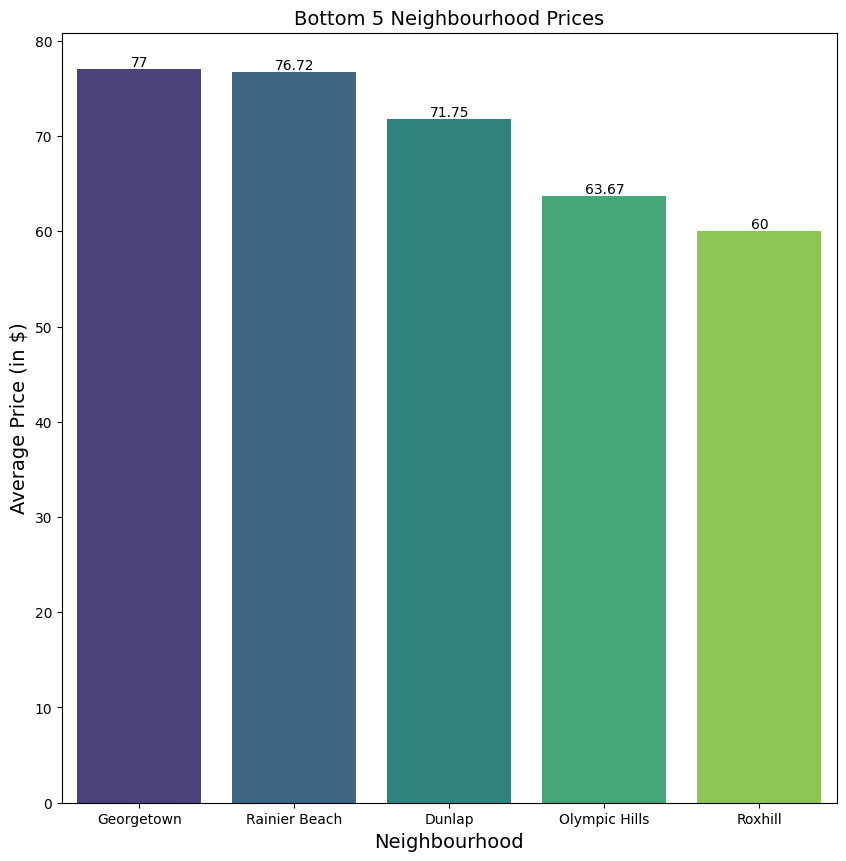

In [39]:
bottom5neigh = neighbourhood.tail(5) # filters bottom 5 neighbourhood

plt.figure(figsize=(10,10))
ax = sns.barplot(data=bottom5neigh, x='neighbourhood',y='price',palette = 'viridis')
plt.title('Bottom 5 Neighbourhood Prices',fontsize=14)
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Average Price (in $)',fontsize=14)
ax.bar_label(ax.containers[0])  # add data labels

From the above analysis, the most expensive neighbourhood is Fairmount Park with avereage price of 370 which is almost 6 tixes more costly than the  cheapest neighbourhood which is Roxhill with avereage price of 60 $. The factor here is the locations where expensive neighbourhoods are close to the sea/coastal area with a good living experience while places like Roxhill is probably situated at the center of the state which could be like a village/farm area with not promising good lifestyle.

## (c) Property v/s Price

In [40]:
property = q1.groupby('property_type')['price'].mean().sort_values(ascending = False).reset_index().round(2)
property

property_type   price
0              Boat  221.67
1       Condominium  155.70
2              Loft  135.97
3            Chalet  135.00
4         Townhouse  134.25
5             House  133.35
6         Apartment  124.47
7         Treehouse  124.00
8          Bungalow  119.00
9   Bed & Breakfast  116.31
10            Cabin  103.65
11             Yurt  100.00
12        Camper/RV   99.56
13            Other   97.06
14             Tent   54.00
15             Dorm   39.50

[Text(0, 0, '221.67'),
 Text(0, 0, '155.7'),
 Text(0, 0, '135.97'),
 Text(0, 0, '135'),
 Text(0, 0, '134.25'),
 Text(0, 0, '133.35'),
 Text(0, 0, '124.47'),
 Text(0, 0, '124'),
 Text(0, 0, '119'),
 Text(0, 0, '116.31'),
 Text(0, 0, '103.65'),
 Text(0, 0, '100'),
 Text(0, 0, '99.56'),
 Text(0, 0, '97.06'),
 Text(0, 0, '54'),
 Text(0, 0, '39.5')]

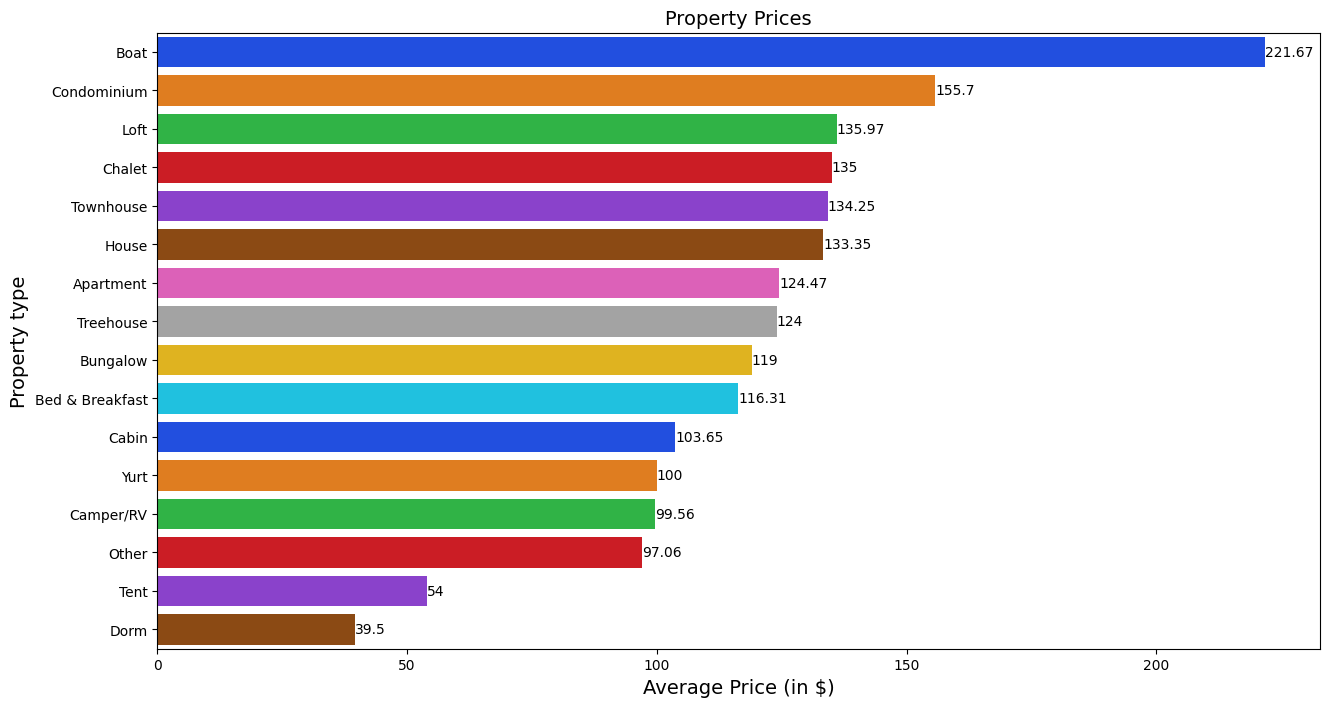

In [41]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=property, x='price',y='property_type',palette = 'bright')
plt.title('Property Prices',fontsize=14)
plt.xlabel('Average Price (in $)',fontsize=14)
plt.ylabel('Property type',fontsize=14)
ax.bar_label(ax.containers[0])  # add data labels

It is observed that the most expensive property types are Boat, Condominium, Loft, Chalet and Townhouse.

A boat property refers to a piece of land that has direct access to a body of water, such as a river, lake, or ocean. This type of property typically includes a boat slip or docking area, as well as land for storage and maintenance of boats. Boat properties can be highly sought after, given the convenience and accessibility they provide to water activities.

There are a lot of factors influencing the rate of boar properties. Here are a few factors:-

1. Water Access: Boat properties provide direct access to the water, offering convenience for water activities such as boating, fishing, and water sports.

2. Scenic Views: Many boat properties offer picturesque views of the surrounding water, creating a serene and peaceful living environment.

3. Convenience: For boat owners, having a boat property means easy access to their watercraft without the need to transport it to and from a marina.

4. Privacy: Depending on the location, boat properties can offer a sense of privacy and exclusivity, especially if they are situated in more secluded areas.

5. Potential Rental Income: Boat properties in popular tourist or vacation destinations can be rented out, providing an additional income stream for the owner.

6. Community Amenities: Some boat properties are part of communities or developments that offer shared amenities such as boat ramps, marinas, and waterfront parks.

## (d) Bed type v/s Price

In [42]:
roomtype = q1.groupby('bed_type')['price'].mean().sort_values(ascending = False).reset_index().round(2)
roomtype

bed_type   price
0       Real Bed  131.79
1         Airbed   76.22
2  Pull-out Sofa   76.21
3          Futon   73.43
4          Couch   69.64

[Text(0, 0, '131.79'),
 Text(0, 0, '76.22'),
 Text(0, 0, '76.21'),
 Text(0, 0, '73.43'),
 Text(0, 0, '69.64')]

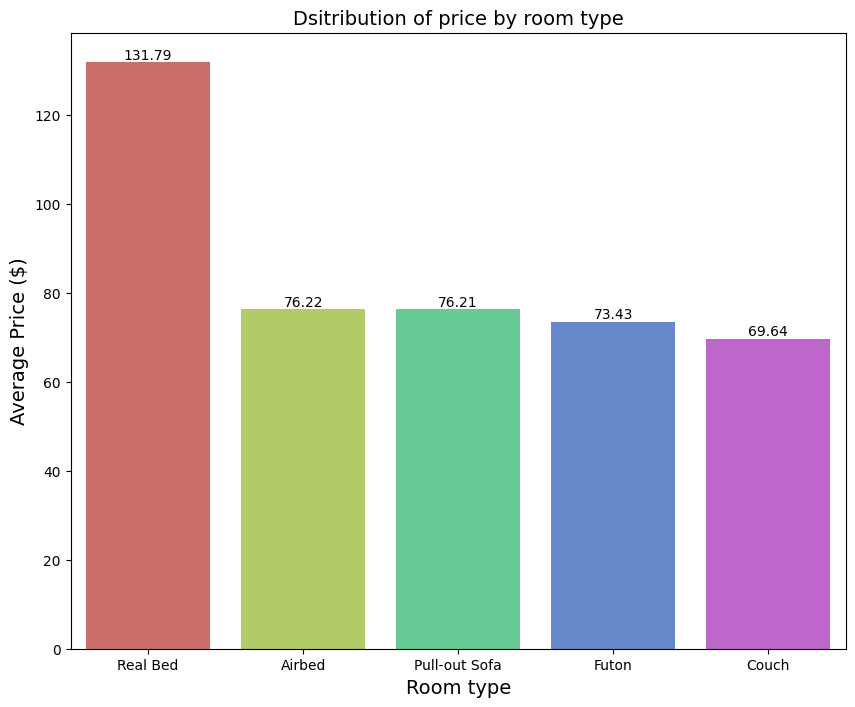

In [43]:
plt.figure(figsize=(10,8))

ax = sns.barplot( data=roomtype, x="bed_type", y="price",palette = 'hls')
plt.title('Dsitribution of price by room type',fontsize=14)
plt.xlabel('Room type',fontsize=14)
plt.ylabel('Average Price ($)',fontsize=14)
ax.bar_label(ax.containers[0])  # add data labels

## (e) Reviews and ratings

In [44]:
reviews = q1.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending = False).reset_index().round(2)
reviews

neighbourhood  number_of_reviews
0     Capitol Hill               8610
1          Ballard               7110
2            Minor               4948
3       Queen Anne               4506
4         Belltown               4228
..             ...                ...
75     Pike Market                 18
76      South Park                 15
77       Pinehurst                  9
78         Roxhill                  2
79  Fairmount Park                  1

[80 rows x 2 columns]

[Text(0, 0, '8610'),
 Text(0, 0, '7110'),
 Text(0, 0, '4948'),
 Text(0, 0, '4506'),
 Text(0, 0, '4228')]

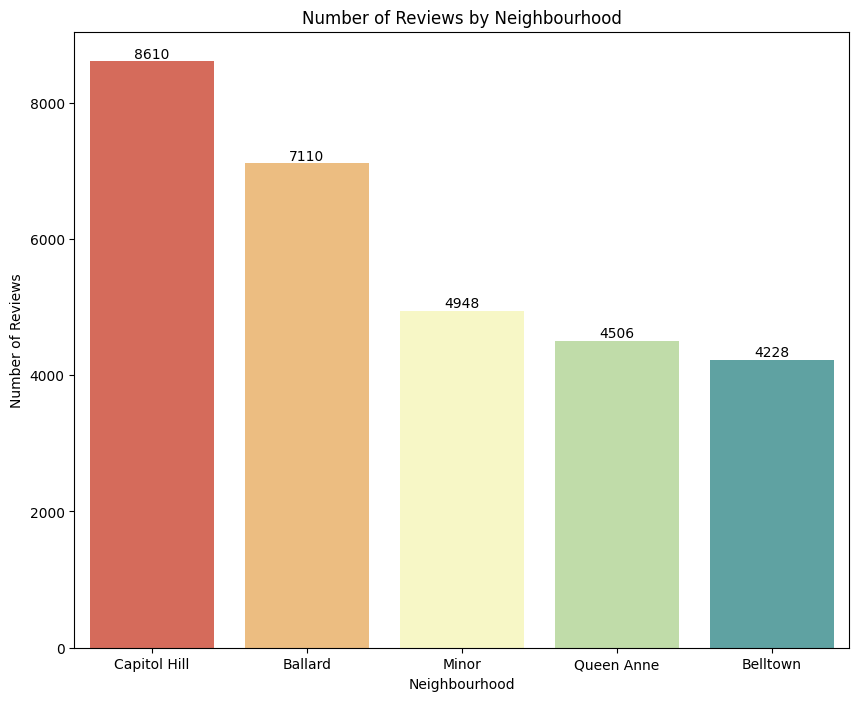

In [45]:
top5 = reviews.head(5)

plt.figure(figsize=(10,8))
ax = sns.barplot(data=top5, x='neighbourhood',y='number_of_reviews',palette = 'Spectral')
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Neighbourhood")
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

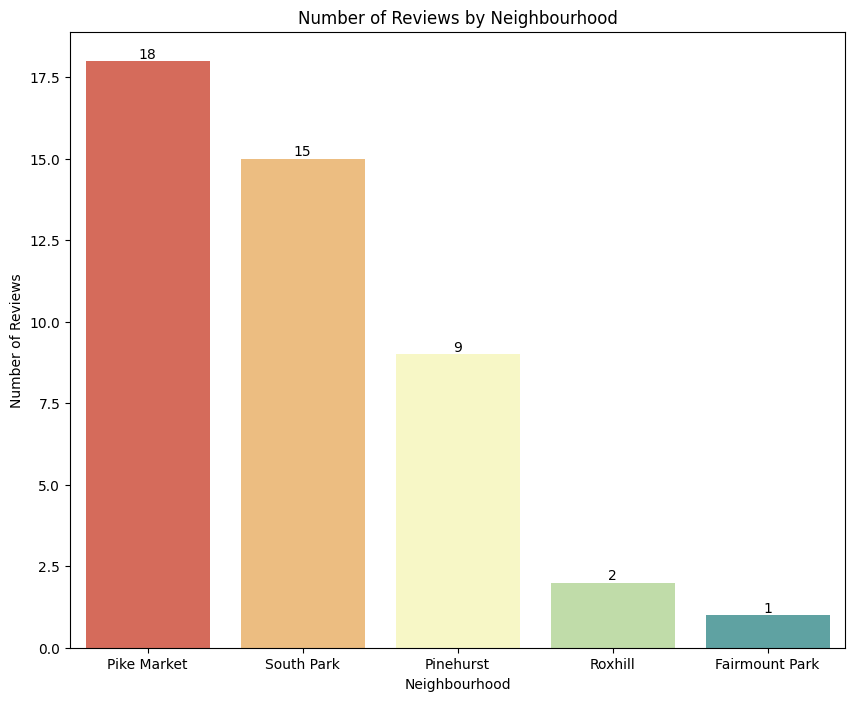

In [46]:
bottom5 = reviews.tail(5)

plt.figure(figsize=(10,8))
ax = sns.barplot(data=bottom5, x='neighbourhood',y='number_of_reviews',palette = 'Spectral')
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Neighbourhood")
ax.bar_label(ax.containers[0])

In [47]:
rrating = q1.groupby('neighbourhood')['review_scores_rating'].mean().sort_values(ascending = False).reset_index().round(2)
rrating

neighbourhood  review_scores_rating
0           Arbor Heights                 98.00
1          Yesler Terrace                 97.21
2              Windermere                 96.91
3              High Point                 96.87
4   Harrison/Denny-Blaine                 96.78
..                    ...                   ...
75                Roxhill                 90.00
76      South Beacon Hill                 89.50
77             View Ridge                 89.26
78    University District                 89.11
79              Pinehurst                 85.67

[80 rows x 2 columns]

[Text(0, 0, '98'),
 Text(0, 0, '97.21'),
 Text(0, 0, '96.91'),
 Text(0, 0, '96.87'),
 Text(0, 0, '96.78')]

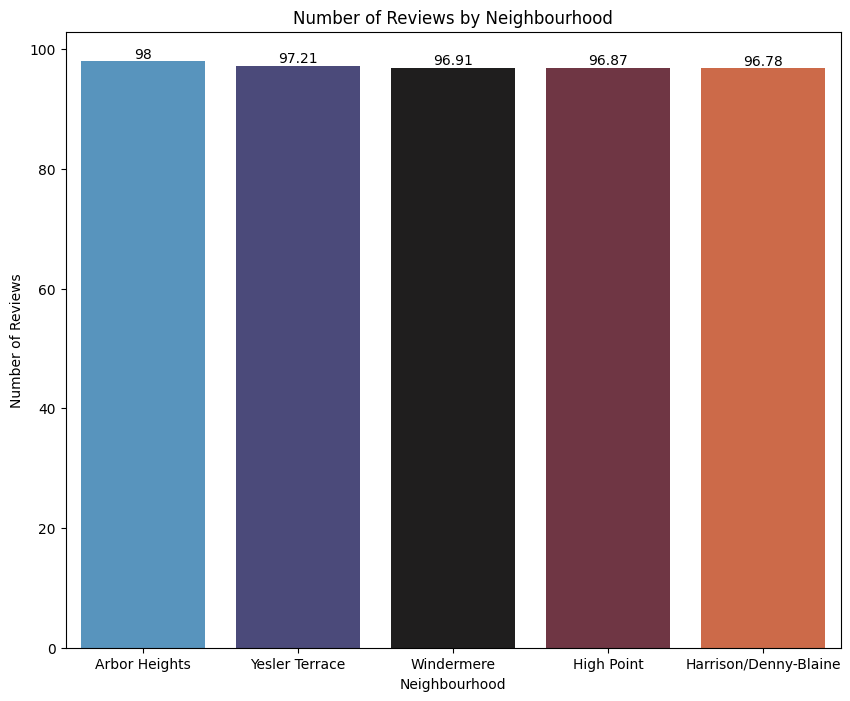

In [48]:
top5 = rrating.head(5)

plt.figure(figsize=(10,8))
ax = sns.barplot(data=top5, x='neighbourhood',y='review_scores_rating',palette = 'icefire')
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Neighbourhood")
ax.bar_label(ax.containers[0])

[Text(0, 0, '90'),
 Text(0, 0, '89.5'),
 Text(0, 0, '89.26'),
 Text(0, 0, '89.11'),
 Text(0, 0, '85.67')]

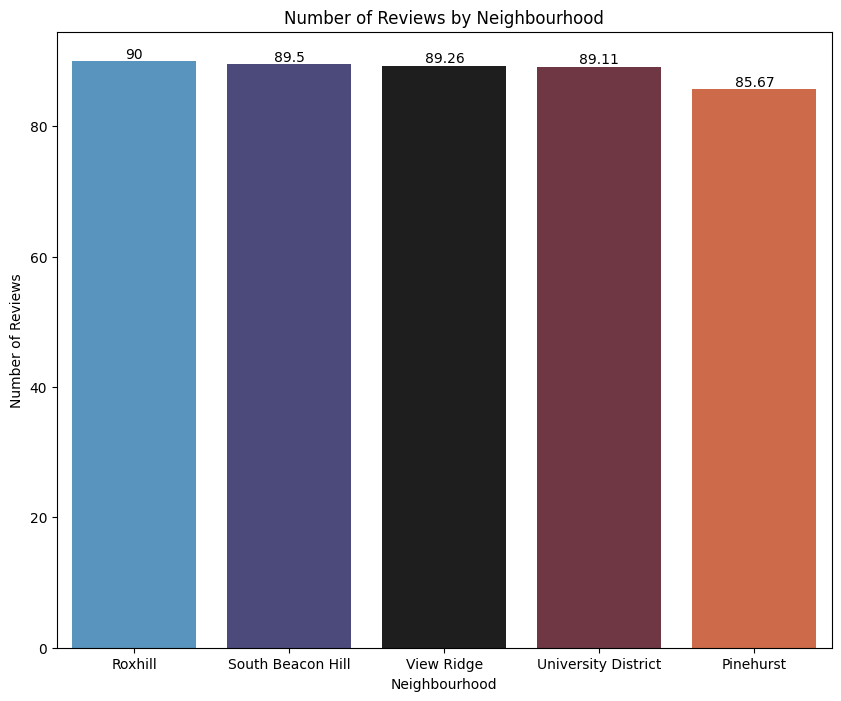

In [49]:
bottom5 = rrating.tail(5)

plt.figure(figsize=(10,8))
ax = sns.barplot(data=bottom5, x='neighbourhood',y='review_scores_rating',palette = 'icefire')
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Neighbourhood")
ax.bar_label(ax.containers[0])

## 2. How does the price range varies throughout the year? Can we detect any seasonal pattern for pricing of the place?

In [50]:
calendar

listing_id       date available   price
0            241032 2016-01-04         t   85.00
1            241032 2016-01-05         t   85.00
2            241032 2016-01-06         f  137.19
3            241032 2016-01-07         f  137.19
4            241032 2016-01-08         f  137.19
...             ...        ...       ...     ...
1393565    10208623 2016-12-29         f  137.19
1393566    10208623 2016-12-30         f  137.19
1393567    10208623 2016-12-31         f  137.19
1393568    10208623 2017-01-01         f  137.19
1393569    10208623 2017-01-02         f  137.19

[1393570 rows x 4 columns]

In [51]:
calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

We can claim that, when the place is not available the price is not available. So, with that logic we will be making a new dataframe named "q2" where the places which are available are placed.

In [52]:
q2 = calendar[calendar['available'] == 't']
q2

listing_id       date available  price
0            241032 2016-01-04         t   85.0
1            241032 2016-01-05         t   85.0
9            241032 2016-01-13         t   85.0
10           241032 2016-01-14         t   85.0
14           241032 2016-01-18         t   85.0
...             ...        ...       ...    ...
1393207    10208623 2016-01-06         t   87.0
1393208    10208623 2016-01-07         t   87.0
1393211    10208623 2016-01-10         t   87.0
1393212    10208623 2016-01-11         t   87.0
1393213    10208623 2016-01-12         t   87.0

[934542 rows x 4 columns]

In [53]:
q2['year']= q2['date'].dt.year
q2['quarter']= q2['date'].dt.quarter
q2['month']= q2['date'].dt.month
q2['name of day']= q2['date'].dt.weekday

<ipython-input-53-5a2e214a67a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['year']= q2['date'].dt.year
<ipython-input-53-5a2e214a67a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['quarter']= q2['date'].dt.quarter
<ipython-input-53-5a2e214a67a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [54]:
q2

listing_id       date available  price  year  quarter  month  \
0            241032 2016-01-04         t   85.0  2016        1      1   
1            241032 2016-01-05         t   85.0  2016        1      1   
9            241032 2016-01-13         t   85.0  2016        1      1   
10           241032 2016-01-14         t   85.0  2016        1      1   
14           241032 2016-01-18         t   85.0  2016        1      1   
...             ...        ...       ...    ...   ...      ...    ...   
1393207    10208623 2016-01-06         t   87.0  2016        1      1   
1393208    10208623 2016-01-07         t   87.0  2016        1      1   
1393211    10208623 2016-01-10         t   87.0  2016        1      1   
1393212    10208623 2016-01-11         t   87.0  2016        1      1   
1393213    10208623 2016-01-12         t   87.0  2016        1      1   

         name of day  
0                  0  
1                  1  
9                  2  
10                 3  
14                 0  
...              ...  
1393207            2  
1393208            3  
1393211            6  
1393212            0  
1393213            1  

[934542 rows x 8 columns]

Now we can perform our analysis

In [55]:
price_date = q2.groupby('date')['price'].mean().reset_index().round(2)
price_date

date   price
0   2016-01-04  122.09
1   2016-01-05  120.68
2   2016-01-06  120.93
3   2016-01-07  120.96
4   2016-01-08  127.64
..         ...     ...
360 2016-12-29  136.90
361 2016-12-30  143.60
362 2016-12-31  144.57
363 2017-01-01  137.54
364 2017-01-02  134.95

[365 rows x 2 columns]

(array([115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 [Text(0, 115.0, '115'),
  Text(0, 120.0, '120'),
  Text(0, 125.0, '125'),
  Text(0, 130.0, '130'),
  Text(0, 135.0, '135'),
  Text(0, 140.0, '140'),
  Text(0, 145.0, '145'),
  Text(0, 150.0, '150'),
  Text(0, 155.0, '155'),
  Text(0, 160.0, '160')])

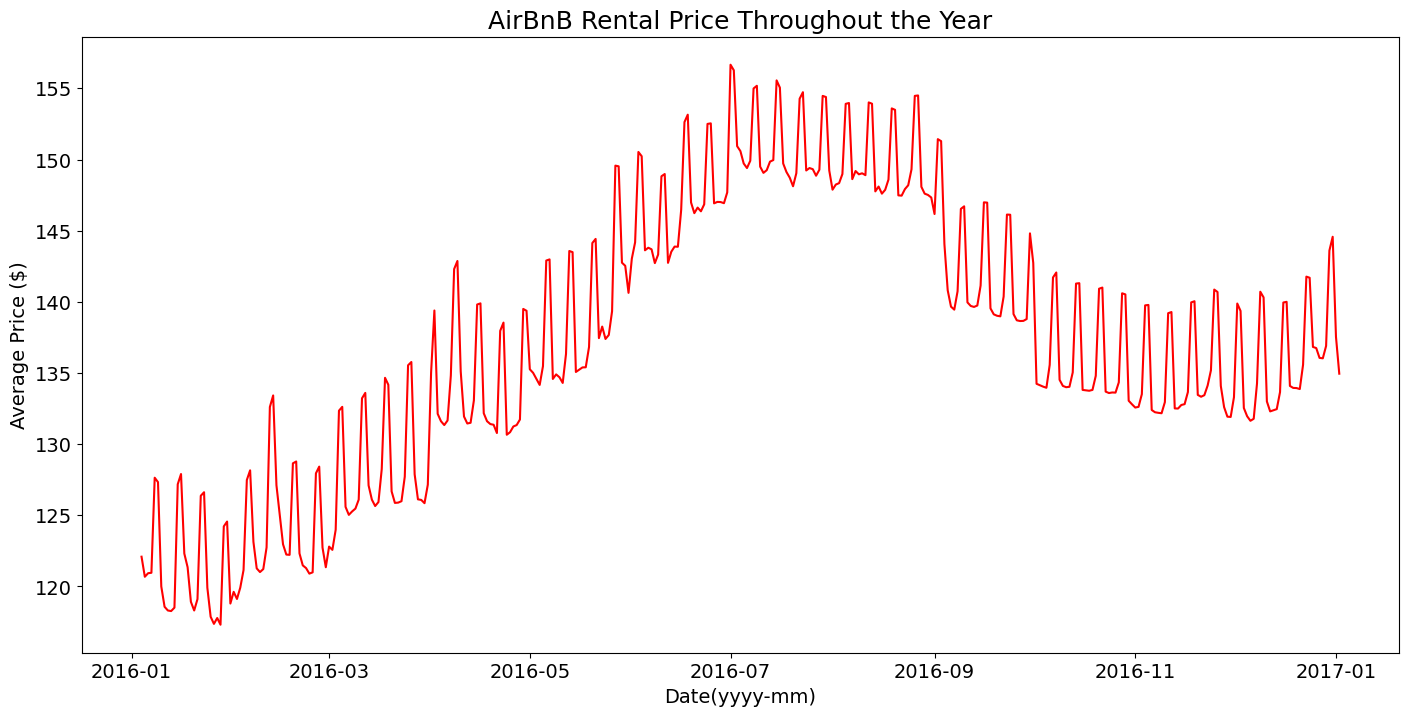

In [56]:
plt.figure(figsize=(17,8))
plt.plot(price_date['date'], price_date['price'], color='r')

plt.title('AirBnB Rental Price Throughout the Year', fontsize=18)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xlabel('Date(yyyy-mm)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [57]:
price_month = pd.pivot_table(data=q2[q2['year'] == 2016],index='month',values='price',aggfunc='mean').reset_index()
price_month

month       price
0       1  121.262546
1       2  123.952667
2       3  127.970619
3       4  134.402410
4       5  138.830886
5       6  146.764492
6       7  151.274891
7       8  149.700212
8       9  142.281313
9      10  136.141037
10     11  134.817271
11     12  136.306839

(array([115., 120., 125., 130., 135., 140., 145., 150., 155.]),
 [Text(0, 115.0, '115'),
  Text(0, 120.0, '120'),
  Text(0, 125.0, '125'),
  Text(0, 130.0, '130'),
  Text(0, 135.0, '135'),
  Text(0, 140.0, '140'),
  Text(0, 145.0, '145'),
  Text(0, 150.0, '150'),
  Text(0, 155.0, '155')])

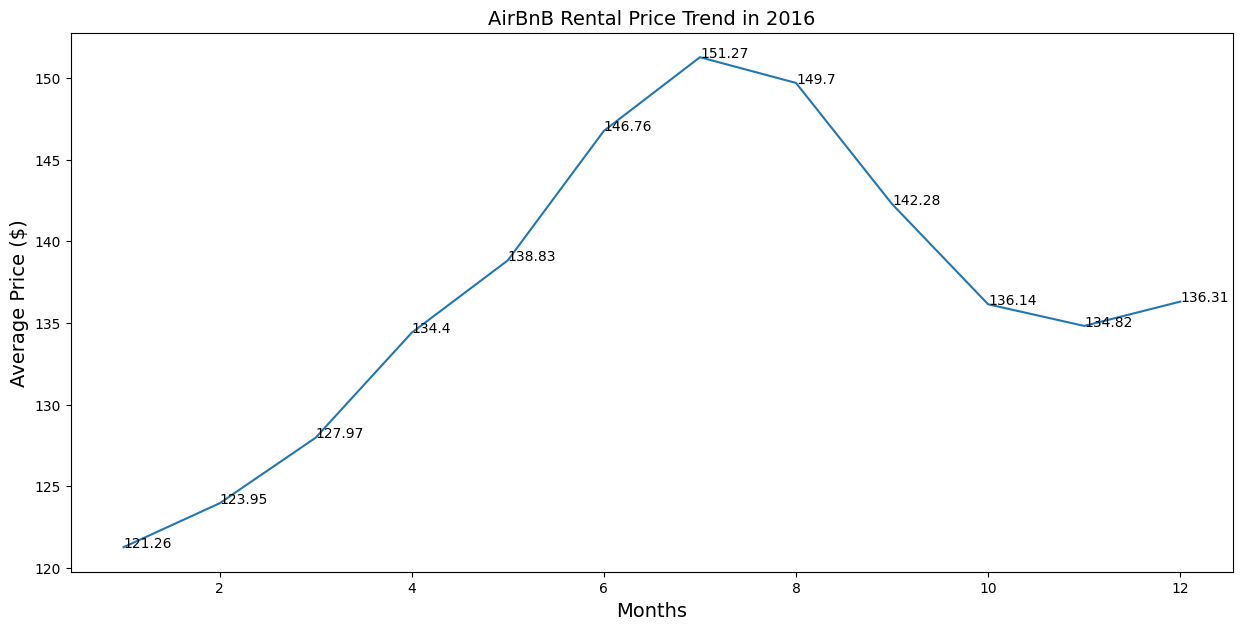

In [58]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=price_month, x=price_month['month'],y=price_month['price'])

for index in range(len(price_month['month'])):
  ax.text(price_month['month'][index], price_month['price'][index], round(price_month['price'][index],2), size=10)

plt.title('AirBnB Rental Price Trend in 2016',fontsize=14)
plt.ylabel('Average Price ($)',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

According to the trend, January and February are the months with the lowest prices with 120. The trend gradually increases upto July where the price skyrockets to 151 and eventually declines to 134 by November and then slightly increases to 136 on December.

Lets try to look at it from the seasonal point of view in US:-
1. January and February are the coldest months of the year. No one would actually get a good experience near the coastal area with cold winds and high currents and the temperature of water. Hence no one would live in these properties hence the prices going down.

2. July and August are the warmest months of the year. These months are the best in the coastal regions which would provide the best living experience. People visit these properties with friends and family and hence with the no. of customers increasing in these times, the prices would skyrocket as compared to the winter months.

3. In December, the price slightly bumps up to 134 and this may be due to Christmas and New Years Eve. Many would liek to travel to special places to enjoy these events.

In this way, the different types of seasons does affect the price rates of these properties.

## 3. How did people felt after their stay?

Now, the reviews dataset shall be analyzed. The concept of Sentiment analysis of Natural Language Processing (NLP) will be used to identify the no. of positive and negative reviews for every property.

In [59]:
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import re
import langid

In [60]:
review

listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  19-07-2015     28943674        Bianca   
1         7202016  39087409  20-07-2015     32440555         Frank   
2         7202016  39820030  26-07-2015     37722850           Ian   
3         7202016  40813543  02-08-2015     33671805        George   
4         7202016  41986501  10-08-2015     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  12-10-2015     37419458          Ryan   
84845     3624990  51024875  17-10-2015      6933252         Linda   
84846     3624990  51511988  20-10-2015     19543701         Jaime   
84847     3624990  52814482  02-11-2015     24445024        Jørgen   
84848     9727246  56429621  13-12-2015     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84831 rows x 6 columns]

In [61]:
review.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Now, lets identify between english and non-english comments using the langid library.

- langid.py is a Python library specifically designed for language identification (LangID).

Key features of langid.py:

1. Fast and efficient: Identifies language quickly, making it suitable for large-scale text processing tasks.
2. Pre-trained model: Comes with a pre-trained model covering 97 languages, eliminating the need for manual training.
3. Minimal dependencies: Requires only Python 2.5 or newer and the numpy library, ensuring easy installation and use.
4. Robust to domain-specific features: Handles text with HTML/XML markup, mixed languages, and other complexities effectively.
5. Deployable as a web service: Can be integrated into web applications for dynamic language identification.

Lets use langid to automatically categorizing text documents by language.

In [62]:
review['English_or_Not'] = review['comments'].apply(lambda x: langid.classify(x)[0])
review

<ipython-input-62-5d515f3280c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['English_or_Not'] = review['comments'].apply(lambda x: langid.classify(x)[0])


listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  19-07-2015     28943674        Bianca   
1         7202016  39087409  20-07-2015     32440555         Frank   
2         7202016  39820030  26-07-2015     37722850           Ian   
3         7202016  40813543  02-08-2015     33671805        George   
4         7202016  41986501  10-08-2015     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  12-10-2015     37419458          Ryan   
84845     3624990  51024875  17-10-2015      6933252         Linda   
84846     3624990  51511988  20-10-2015     19543701         Jaime   
84847     3624990  52814482  02-11-2015     24445024        Jørgen   
84848     9727246  56429621  13-12-2015     30860360     Stephanie   

                                                comments English_or_Not  
0      Cute and cozy place. Perfect location to every...             en  
1      Kelly has a great room in a very central locat...             en  
2      Very spacious apartment, and in a great neighb...             en  
3      Close to Seattle Center and all it has to offe...             en  
4      Kelly was a great host and very accommodating ...             en  
...                                                  ...            ...  
84844  The description and pictures of the apartment ...             en  
84845  We had an excellent stay. It was clean and com...             en  
84846  Gran ubicación, cerca de todo lo atractivo del...             es  
84847  Very good apartement, clean and well sized. Si...             en  
84848  Breanne was a great host. Check in was easy, s...             en  

[84831 rows x 7 columns]

In [63]:
non_eng = review[review['English_or_Not']!='en']
print('There are {} non English comments.'.format(non_eng.shape[0]))
non_eng['comments'].tail(10)

There are 1115 non English comments.


83944    Petite perle à Seattle! Ce logement nous a séd...
83953    Barbara und Michael empfingen uns mit offenen ...
84066    A relaxing, nice place. Accurate description. ...
84071    Margot è sempre stata gentile e disponibile. L...
84117    숙소가 깔끔하고 아늑했다. 주변이 조용해 휴식을 취하기에 가장 적절한 장소였다. 집...
84121    Fue agradable, los anfitriones preparan tu est...
84338    非常舒适安静的房子，床边有窗户，晚上睡觉可以看见星星月亮，房东非常热情，退房的时候我去机场，...
84378    Die Unterkunft war sehr schön und genau so, wi...
84405                                Was definitely great 
84846    Gran ubicación, cerca de todo lo atractivo del...
Name: comments, dtype: object

In [64]:
eng = review[review['English_or_Not'] =='en']
print('There are {} English comments.'.format(eng.shape[0]))
eng['comments'].tail(10)

There are 83716 English comments.


84838    We were warmly greeted by Doug at the time agr...
84839    The apartment was clean, tidy and as described...
84840    We were with 7 people in rebecca's two 2-bed a...
84841    Great place in the middle of the city. Easy to...
84842    We loved how close it was to the Convention Ce...
84843    Comfortability upon arrival and everything wit...
84844    The description and pictures of the apartment ...
84845    We had an excellent stay. It was clean and com...
84847    Very good apartement, clean and well sized. Si...
84848    Breanne was a great host. Check in was easy, s...
Name: comments, dtype: object

There are 1115 non English comments and 83716 English comments. So for this since majority of the viewers are comfortable with english and speak english as it is considered as an international language, the sentimental analysis shall be done for only english comments.

In [65]:
review = review[review['English_or_Not'] == 'en']
review

listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  19-07-2015     28943674        Bianca   
1         7202016  39087409  20-07-2015     32440555         Frank   
2         7202016  39820030  26-07-2015     37722850           Ian   
3         7202016  40813543  02-08-2015     33671805        George   
4         7202016  41986501  10-08-2015     34959538          Ming   
...           ...       ...         ...          ...           ...   
84843     3624990  49768901  06-10-2015     37578535       Michael   
84844     3624990  50436321  12-10-2015     37419458          Ryan   
84845     3624990  51024875  17-10-2015      6933252         Linda   
84847     3624990  52814482  02-11-2015     24445024        Jørgen   
84848     9727246  56429621  13-12-2015     30860360     Stephanie   

                                                comments English_or_Not  
0      Cute and cozy place. Perfect location to every...             en  
1      Kelly has a great room in a very central locat...             en  
2      Very spacious apartment, and in a great neighb...             en  
3      Close to Seattle Center and all it has to offe...             en  
4      Kelly was a great host and very accommodating ...             en  
...                                                  ...            ...  
84843  Comfortability upon arrival and everything wit...             en  
84844  The description and pictures of the apartment ...             en  
84845  We had an excellent stay. It was clean and com...             en  
84847  Very good apartement, clean and well sized. Si...             en  
84848  Breanne was a great host. Check in was easy, s...             en  

[83716 rows x 7 columns]

In [67]:
review_en = review[['comments']].reset_index(drop=True)
review_en

comments
0      Cute and cozy place. Perfect location to every...
1      Kelly has a great room in a very central locat...
2      Very spacious apartment, and in a great neighb...
3      Close to Seattle Center and all it has to offe...
4      Kelly was a great host and very accommodating ...
...                                                  ...
83711  Comfortability upon arrival and everything wit...
83712  The description and pictures of the apartment ...
83713  We had an excellent stay. It was clean and com...
83714  Very good apartement, clean and well sized. Si...
83715  Breanne was a great host. Check in was easy, s...

[83716 rows x 1 columns]

In [74]:
## lower case
review_en['comments']  = review_en['comments'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [70]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he shall have ",
"he's": "e is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [75]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(text,contractions=contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

review_en['comments']=review_en['comments'].apply(lambda x:expand_contractions(x))

In [76]:
# removing punctuation
print(string.punctuation)
def remove_punc(txt):
    txt_nopunct = "".join([x for x in txt if x not in string.punctuation])
    return txt_nopunct

review_en['comments'] = review_en['comments'].apply(lambda x: remove_punc(x))
review_en.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


comments
0  cute and cozy place perfect location to everyt...
1  kelly has a great room in a very central locat...
2  very spacious apartment and in a great neighbo...
3  close to seattle center and all it has to offe...
4  kelly was a great host and very accommodating ...

In [77]:
#removing numbers
numbers = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']
review_en['comments'] = review_en['comments'].apply(lambda x: ' '.join(x for x in x.split() if x not in numbers))

In [81]:
#removing stopwords
sr = stopwords.words('english')
review_en['comments'] = review_en['comments'].apply(lambda x: ' '.join(x for x in x.split() if x not in sr))
review_en.head()

comments
0        cute cozy place perfect location everything
1  kelly great room central location beautiful bu...
2  spacious apartment great neighborhood kind apa...
3  close seattle center offer ballet theater muse...
4  kelly great host accommodating great neighborh...

In [82]:
sentiment=[]
sentiment_score = []
keywords = []

for x in review_en['comments'] :
    senti=TextBlob(x) ## sentiment analysis using TextBlob

    Token= [t for t in x.split()] ## string the tokens/keywords
    keywords.append(Token)

    ## conditions for division of sentiment
    if senti.sentiment.polarity > 0 and senti.sentiment.polarity <= 1 :
        sentiment_score.append(senti.sentiment.polarity)
        sentiment.append("Positive")
    else:
        sentiment_score.append(senti.sentiment.polarity)
        sentiment.append("Negative")

## storing the new data in our dataset
review_en['Keywords']= keywords
review_en['Sentiment']= sentiment
review_en['Sentiment_Score'] = sentiment_score

In [83]:
review_en

comments  \
0            cute cozy place perfect location everything   
1      kelly great room central location beautiful bu...   
2      spacious apartment great neighborhood kind apa...   
3      close seattle center offer ballet theater muse...   
4      kelly great host accommodating great neighborh...   
...                                                  ...   
83711  comfortability upon arrival everything within ...   
83712  description pictures apartment exactly receive...   
83713  excellent stay clean comfortable convenient co...   
83714  good apartement clean well sized situated next...   
83715  breanne great host check easy let right schedu...   

                                                Keywords Sentiment  \
0      [cute, cozy, place, perfect, location, everyth...  Positive   
1      [kelly, great, room, central, location, beauti...  Positive   
2      [spacious, apartment, great, neighborhood, kin...  Positive   
3      [close, seattle, center, offer, ballet, theate...  Positive   
4      [kelly, great, host, accommodating, great, nei...  Positive   
...                                                  ...       ...   
83711  [comfortability, upon, arrival, everything, wi...  Positive   
83712  [description, pictures, apartment, exactly, re...  Positive   
83713  [excellent, stay, clean, comfortable, convenie...  Positive   
83714  [good, apartement, clean, well, sized, situate...  Positive   
83715  [breanne, great, host, check, easy, let, right...  Positive   

       Sentiment_Score  
0             0.433333  
1             0.281250  
2             0.488889  
3             0.358333  
4             0.514815  
...                ...  
83711         0.416667  
83712         0.164286  
83713         0.333333  
83714         0.155208  
83715         0.353968  

[83716 rows x 4 columns]

In [84]:
review_en['Sentiment'].value_counts()

Positive    82156
Negative     1560
Name: Sentiment, dtype: int64

In [90]:
q3_positive=review_en[review_en['Sentiment']== 'Positive']
q3_positive=q3_positive.reset_index(drop=True)
q3_positive

comments  \
0            cute cozy place perfect location everything   
1      kelly great room central location beautiful bu...   
2      spacious apartment great neighborhood kind apa...   
3      close seattle center offer ballet theater muse...   
4      kelly great host accommodating great neighborh...   
...                                                  ...   
82151  comfortability upon arrival everything within ...   
82152  description pictures apartment exactly receive...   
82153  excellent stay clean comfortable convenient co...   
82154  good apartement clean well sized situated next...   
82155  breanne great host check easy let right schedu...   

                                                Keywords Sentiment  \
0      [cute, cozy, place, perfect, location, everyth...  Positive   
1      [kelly, great, room, central, location, beauti...  Positive   
2      [spacious, apartment, great, neighborhood, kin...  Positive   
3      [close, seattle, center, offer, ballet, theate...  Positive   
4      [kelly, great, host, accommodating, great, nei...  Positive   
...                                                  ...       ...   
82151  [comfortability, upon, arrival, everything, wi...  Positive   
82152  [description, pictures, apartment, exactly, re...  Positive   
82153  [excellent, stay, clean, comfortable, convenie...  Positive   
82154  [good, apartement, clean, well, sized, situate...  Positive   
82155  [breanne, great, host, check, easy, let, right...  Positive   

       Sentiment_Score  
0             0.433333  
1             0.281250  
2             0.488889  
3             0.358333  
4             0.514815  
...                ...  
82151         0.416667  
82152         0.164286  
82153         0.333333  
82154         0.155208  
82155         0.353968  

[82156 rows x 4 columns]

In [95]:
comments = ''.join(list(q3_positive['comments'].values))
comments = comments.replace('\r', ' ')
comments = comments.replace('\n', ' ')
comments = comments.replace('Seattle', ' ')
comments = comments.replace('seattle', ' ')
comments[:5000]

'cute cozy place perfect location everythingkelly great room central location beautiful building architecture style really like felt guite home wish spent time went walk found   center major food festival progress treat visited space needle chihuly glass exhibit pikes place market wow thanks great stayspacious apartment great neighborhood kind apartment wish really get meet kelly always readily available phone believe issue want call finding place park sincerely doubt easy park anywhere residential area pm fridayclose   center offer ballet theater museum space needle restaurants ilk blocks away metropolitan probably coolest grocer ever find easy find kelly warm welcoming really interesting talkkelly great host accommodating great neighborhood great coffee around much stay time spent interacting pleasant apartment great location close   center neighborhood lot good food wellkelly great place great looking clean simple well kept place min walk   bike share aug 2015 used weekkelly great n

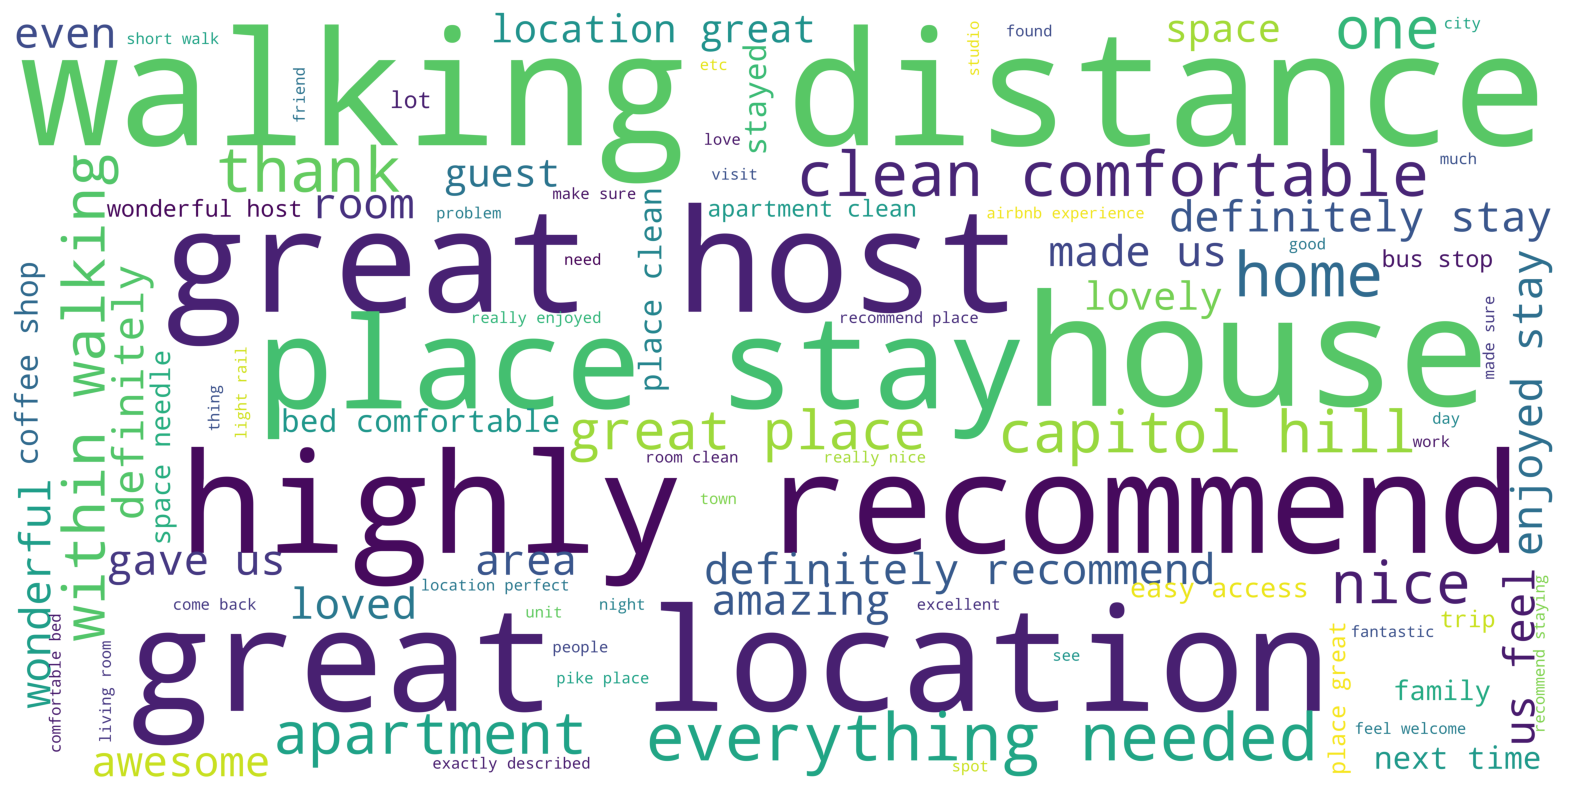

In [97]:
plt.figure(figsize=(20, 12))
wordcloud =  WordCloud(background_color='white', max_words=1000, max_font_size=100, stopwords=STOPWORDS, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [94]:
q3_negative=review_en[review_en['Sentiment']== 'Negative']
q3_negativee=q3_negative.reset_index(drop=True,inplace=True)
q3_negative

comments  \
0     host canceled reservation 21 days arrival auto...   
1         host made feel home welcomed open personality   
2     cozy private space close beach shopping main s...   
3     jessica accommodating let us leave luggage pla...   
4                                       blue room rocks   
...                                                 ...   
1555  reservation canceled days arrival automated po...   
1556  following last review however things would giv...   
1557  host canceled reservation days arrival automat...   
1558  location location location close freemont priv...   
1559  hal welcoming met us soon arrived gave us tour...   

                                               Keywords Sentiment  \
0     [host, canceled, reservation, 21, days, arriva...  Negative   
1     [host, made, feel, home, welcomed, open, perso...  Negative   
2     [cozy, private, space, close, beach, shopping,...  Negative   
3     [jessica, accommodating, let, us, leave, lugga...  Negative   
4                                   [blue, room, rocks]  Negative   
...                                                 ...       ...   
1555  [reservation, canceled, days, arrival, automat...  Negative   
1556  [following, last, review, however, things, wou...  Negative   
1557  [host, canceled, reservation, days, arrival, a...  Negative   
1558  [location, location, location, close, freemont...  Negative   
1559  [hal, welcoming, met, us, soon, arrived, gave,...  Negative   

      Sentiment_Score  
0            0.000000  
1            0.000000  
2           -0.144271  
3            0.000000  
4            0.000000  
...               ...  
1555         0.000000  
1556        -0.034074  
1557         0.000000  
1558        -0.066667  
1559         0.000000  

[1560 rows x 4 columns]

In [98]:
comments = ''.join(list(q3_negative['comments'].values))
comments = comments.replace('\r', ' ')
comments = comments.replace('\n', ' ')
comments = comments.replace('Seattle', ' ')
comments = comments.replace('seattle', ' ')
comments[:5000]

'host canceled reservation 21 days arrival automated postinghost made feel home welcomed open personalitycozy private space close beach shopping main street restaurants thing little uncomfortable weather cold bathroomshower outside room one go patio main housejessica accommodating let us leave luggage place checkin even left us handwritten card welcoming usblue room rockscomfycleanquietvery nicethankyuhost canceled reservation day arrival automated postingreservation canceled 132 days arrival automated postingreservation canceled 37 days arrival automated postinghost canceled reservation days arrival automated postingsmall cozy easy downtownreservation canceled 12 days arrival automated postingshortgreat stay corey amandas place wish could longer would definitely recommendspace looks seen pictures artsy eclectic cory amanda extremely welcoming accommodatingunit akin longterm corporate housing condo unit clean neat pedestrian kitchen pots pans dishes utensils lacks cooking oil spices sa

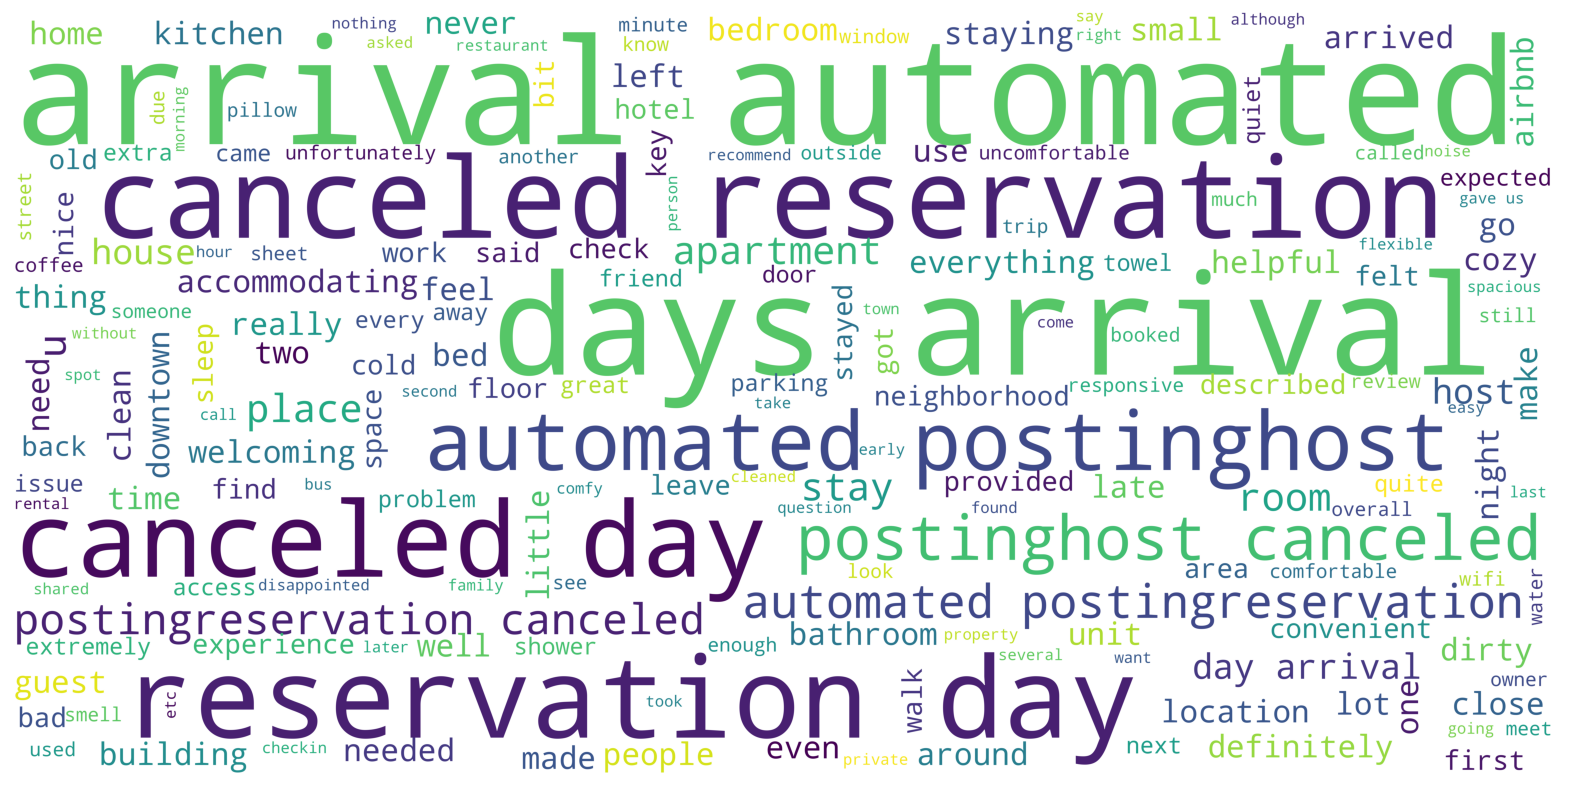

In [99]:
plt.figure(figsize=(20, 12))
wordcloud =  WordCloud(background_color='white', max_words=1000, max_font_size=100, stopwords=STOPWORDS, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Here, in our comments, we had both positive and negative comments. We had 82157 positive comments and 1559 negative comments.

For the positive comments, we can see that, the host, the location, comfort of the stay, cleanliness, walking distance for different experiences like restaurants, park, recreational activities matters for the renters and if they really enjoyed the place, they are more likely to recommendate others also. So, for the host to get good reviews and booking, they should communicate clearly, in detail tell the renters the house rules, the nearby places to visit which can be within the walking distance, the place should be comfortable and clean.

Whereas, the negative comments mainly comes to a host, when the reservation is cancled or the posting of the place and the reply from the host is automated. People like to have genuine conservation with each other. They don't like to talk with some robot making them think they are not important and host is too busy to host them. Which in turn makes a bad impression and leaves a negative review.

##Act

###Findings:

From Research Question 1:

- The superhost status does not increase or decrease the price of a place.
- The most expensive neighbourhood is Fairmount Park with avereage price of 370 which is almost 6 tixes more costly than the  cheapest neighbourhood which is Roxhill with avereage price of 60 $. The factor here is the locations where expensive neighbourhoods are close to the sea/coastal area with a good living experience while places like Roxhill is probably situated at the center of the state which could be like a village/farm area with not promising good lifestyle.
- Boat is the most expensive property type to stay at.
- Renting an entire house or apartment cost the most.

From Research Question 2:

- The price of the rental properties goes on increasing gradually until the month of July which has an average price of 152 dollars and after July, the price start to decrease until December which has a small bump in price. Their might be some coorealtion with the Seasonal flucation and pricing of the rental price. However, we cannot say the season are causing the price change as their might be other factors affecting the price of a place with conjuction to seasonal flucation.

From Research Question 3:

- We got 82157 positive comments and 1559 negative comments. The positive comments were mainly around the host interaction, the loaction of the neighbourhood, comfort of the stay, cleanliness, walking distance to different nearby places. Whereas, the negative comments, mainly revolved around the host cancling the reservation and posting the ad and reply being automated which convey that the host is not welcoming or not free enough to host them.

###Limitations

As, with all the analysis their is some kind of limitations. We also have some of them.

In the analysis of question 1, we have only done univariate analysis. However, bivariate or trivariate analysis can be more effective to find the relationship of price with the variables. Like analysis of host being superhost and review_score with price could have give us more indepth idea about how much actually 5 star superhost is making in comparision with 5 star non-superhost.

In the analysis of question 3, we can see, we still have some stopwords in our word cloud which means those words are not included in nltk stopwords dictionary. So, we could have added them manually to make our word cloud more accurate. Also, doing bigram or trigram analysis would have given us more idea what really the renter felt in their stay.